    月份      销售金额
0    1  344878.0
1    2  375111.0
2    3  431575.0
3    4  408359.0
4    5  463358.0
5    6  424416.0
6    7  490090.0
7    8  468356.0
8    9  433489.0
9   10  485727.0
10  11  484643.0
11  12  470306.0


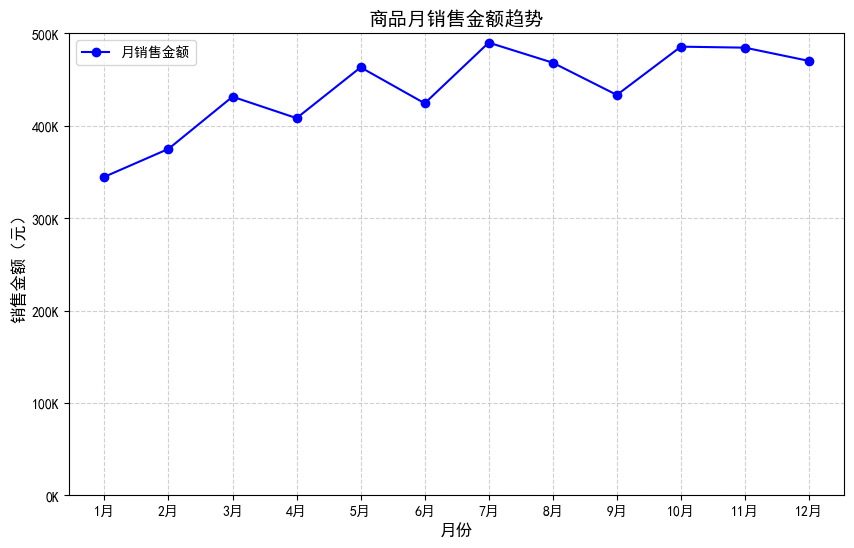

<Figure size 1200x600 with 0 Axes>

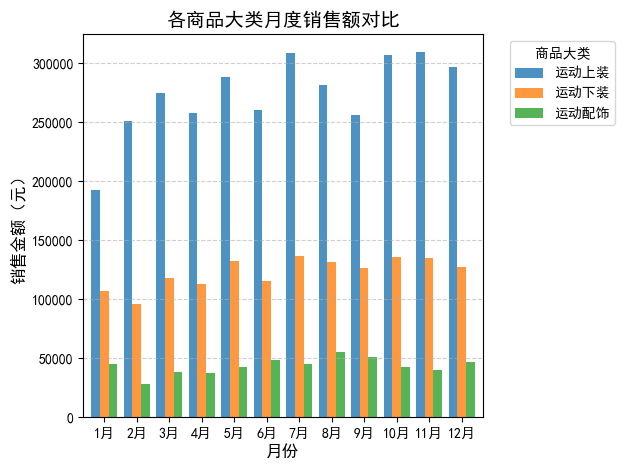

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

data1 = pd.read_excel("商品销售数据.xlsx",sheet_name="信息表")
data2 = pd.read_excel("商品销售数据.xlsx",sheet_name="销售数据表")
data_all = pd.merge(data1, data2, on="商品编号",how="right")
data_all["销售金额"] = data_all["商品销售价"]*data_all["订单数量"]
data_all["月份"] = pd.to_datetime(data_all["订单日期"]).dt.month
monthly_sales = data_all.groupby("月份")["销售金额"].sum().reset_index()
grouped_data = data_all.groupby(["月份", "商品大类"])["销售金额"].sum().unstack()

print(monthly_sales)

plt.rcParams['font.sans-serif'] = ['SimHei']  # Windows
x = monthly_sales["月份"]
y = monthly_sales["销售金额"]
plt.figure(figsize=(10, 6)) 
plt.plot(x, y, marker='o', linestyle='-', color='b', label="月销售金额")
plt.title("商品月销售金额趋势", fontsize=14)
plt.xlabel("月份", fontsize=12)
plt.ylabel("销售金额（元）", fontsize=12)
plt.xticks(range(1, 13), labels=[f"{i}月" for i in range(1, 13)])
plt.yticks(range(0, int(y.max()) + 100000, 100000), 
           labels=[f"{i//1000}K" for i in range(0, int(y.max()) + 100000, 100000)])
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
grouped_data.plot(kind='bar', width=0.8, alpha=0.8)
plt.title("各商品大类月度销售额对比", fontsize=14)
plt.xlabel("月份", fontsize=12)
plt.ylabel("销售金额（元）", fontsize=12)
plt.xticks(range(12), [f"{i}月" for i in range(1, 13)], rotation=0) 
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend(title="商品大类", bbox_to_anchor=(1.05, 1)) 
plt.tight_layout()  # 自动调整布局
plt.show()